In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
movies=pd.read_csv("C:\\Users\\hp\\Downloads\\my_movies.csv")

In [3]:
movies = movies.iloc[:,[0,1,2,3,4]]
### Considering only the transactions, i.e the textual transactions.

In [4]:
#### Imputation to convert the nan values to 0's##
movies.iloc[:,2:5] = movies.iloc[:,2:5].apply(lambda x:x.fillna(0))

In [5]:
X = pd.get_dummies(movies[['V1','V2','V3','V4','V5']])

In [6]:
#####Creating model with dummies of NAN values ###

In [7]:
x_dummies = X.iloc[:,[9,14,16]]

In [46]:
### Running Apriori algorithm
##With support=0,005 and max_len=2
frequent_items = apriori(x_dummies,min_support = 0.005, max_len =2 , use_colnames = True )
frequent_items.sort_values('support', ascending = False, inplace = True)
frequent_items

,support,itemsets
2,0.9,(V5_0)
1,0.8,(V4_0)
5,0.8,"(V5_0, V4_0)"
0,0.3,(V3_0)
3,0.3,"(V3_0, V4_0)"
4,0.3,"(V3_0, V5_0)"


In [47]:
## Building rules
## with min_threshold =1
rules_dummies = association_rules(frequent_items, metric = 'lift', min_threshold = 1)
rules_dummies.sort_values('lift',ascending =False,inplace =True)
rules_dummies

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
3,(V4_0),(V3_0),0.8,0.3,0.3,0.375000,1.250000,0.06,1.12
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.80
1,(V4_0),(V5_0),0.8,0.9,0.8,1.000000,1.111111,0.08,inf
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
5,(V5_0),(V3_0),0.9,0.3,0.3,0.333333,1.111111,0.03,1.05


In [10]:
######## To eliminate redudancy in rules########

def to_list(i):
    return(sorted(i))
    
rules_add = rules_dummies.antecedents.apply(to_list) + rules_dummies.consequents.apply(to_list)

rules_add = rules_add.apply(sorted)

rules_set = list(rules_add)

unique_rules = [list(m) for m in set(tuple(i) for i in rules_set)]
index_rules = []
for i in unique_rules:
    index_rules.append(rules_set.index(i))
    

In [48]:
## rules without redudancy##
rules_without_redud = rules_dummies.iloc[index_rules,:]
rules_without_redud

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(V3_0),(V4_0),0.3,0.8,0.3,1.000000,1.250000,0.06,inf
4,(V3_0),(V5_0),0.3,0.9,0.3,1.000000,1.111111,0.03,inf
0,(V5_0),(V4_0),0.9,0.8,0.8,0.888889,1.111111,0.08,1.8


In [12]:
### sorting
rules_without_redud.sort_values('lift', ascending = False, inplace =True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
## Support and confidence
Support = rules_without_redud['support']
confidence = rules_without_redud['confidence']


Text(0, 0.5, 'Confidence')

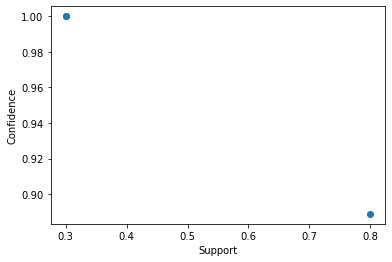

In [14]:
import matplotlib.pyplot as plt

plt.scatter(Support,confidence);plt.xlabel("Support");plt.ylabel("Confidence")


In [15]:
### Model with other than Zero values#####
x_without_dum = X.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12,13,15,17]]


In [49]:
# Applying Apriori with support = 0.005 and max length =2
frequents_item1 = apriori(x_without_dum, min_support=0.005, max_len = 2, use_colnames=True)
frequents_item1.sort_values('support',ascending = False, inplace = True)
frequents_item1

,support,itemsets
0,0.6,(V1_Gladiator)
8,0.6,(V2_Patriot)
15,0.6,"(V2_Patriot, V1_Gladiator)"
12,0.4,(V3_Sixth Sense)
17,0.4,"(V1_Gladiator, V3_Sixth Sense)"
32,0.4,"(V2_Patriot, V3_Sixth Sense)"
24,0.2,"(V1_Sixth Sense, V4_Green Mile)"
3,0.2,(V1_Sixth Sense)
13,0.2,(V4_Green Mile)
25,0.1,"(V1_Sixth Sense, V5_LOTR2)"


In [50]:
#Building rules with minimum threshold = 1
rules_without = association_rules(frequents_item1, metric='lift', min_threshold =1)
rules_without.sort_values('lift',ascending = False, inplace =True)
rules_without

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(V2_LOTR),(V3_Gladiator),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
29,(V5_LOTR2),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
38,(V1_LOTR1),(V2_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
17,(V3_Harry Potter1),(V2_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
16,(V2_LOTR1),(V3_Harry Potter1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
11,(V3_Gladiator),(V2_LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
21,(V5_LOTR2),(V2_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
28,(V3_Harry Potter1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
20,(V2_LOTR1),(V5_LOTR2),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
39,(V2_LOTR2),(V1_LOTR1),0.1,0.1,0.1,1.000000,10.000000,0.09,inf


In [18]:
##Eliminate the reducdancy####
def to_list_out(i):
    return(sorted(i))
    
rules_out_add = rules_without.antecedents.apply(to_list_out)+rules_without.consequents.apply(to_list_out)

rules_out_add = rules_out_add.apply(sorted)
rules_set_out = list(rules_out_add)

In [19]:
#unique values
unique_values_out = [list(n) for n in set(tuple(i) for i in rules_set_out)]
index_rules_out=[]
for i in unique_values_out:
    index_rules_out.append(rules_set_out.index(i))

In [51]:
# rules without redundancy
rules_without_out = rules_without.iloc[index_rules_out,:]
rules_without_out.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(V1_Sixth Sense),(V3_Harry Potter1),0.2,0.1,0.1,0.5,5.000000,0.08,1.8
34,(V1_Sixth Sense),(V2_LOTR1),0.2,0.1,0.1,0.5,5.000000,0.08,1.8
0,(V2_Patriot),(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
37,(V1_Sixth Sense),(V2_LOTR),0.2,0.1,0.1,0.5,5.000000,0.08,1.8
15,(V2_LOTR1),(V4_Green Mile),0.1,0.2,0.1,1.0,5.000000,0.08,inf


In [21]:
# Sorting
rules_without_out.sort_values('lift', ascending= False, inplace =True)


C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [22]:
Support_out = rules_without_out["support"]
Confidence_out = rules_without_out["confidence"]
lift = rules_without_out["lift"]

Text(0.5, 0, 'lift')

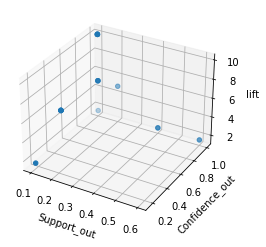

In [23]:
### Plotting 3D plot for support, confidence and lift
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(Support_out, Confidence_out, lift)
ax.set_xlabel("Support_out")
ax.set_ylabel("Confidence_out")
ax.set_zlabel("lift")

Text(0, 0.5, 'Confidence')

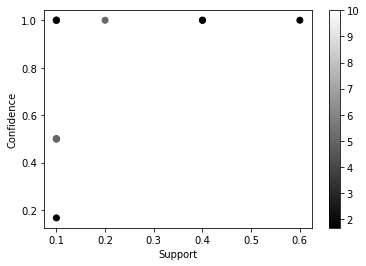

In [24]:
# scatter plot for rules for support, confidence and lift
import matplotlib.pyplot as plt
import scipy as sp

plt.scatter(Support_out, Confidence_out,c= lift,cmap='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("Confidence")


In [25]:
##Creating the model with the dummy variables given in the data set itself#####
##importing the same dataset to work on

In [34]:
data_dummies = pd.read_csv("C:\\Users\\hp\\Downloads\\my_movies.csv")
data_dummies = data_dummies.iloc[:,5:]
data_dummies

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [35]:
# applying apriori with support = 0.005, max length = 2

frequent_ori = apriori(data_dummies, min_support = 0.005, max_len=2, use_colnames = True)
frequent_ori.sort_values('support',ascending =False , inplace =True)
frequent_ori

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Patriot, Gladiator)"
10,0.5,"(Gladiator, Sixth Sense)"
13,0.4,"(Patriot, Sixth Sense)"
5,0.2,(LOTR2)
9,0.2,(Green Mile)
3,0.2,(Harry Potter1)
16,0.2,"(Green Mile, Sixth Sense)"


In [36]:
# Building rules with lift and minimum threshold =1
rules_ori = association_rules(frequent_ori, metric= 'lift', min_threshold =1)
rules_ori.sort_values('lift', ascending =False, inplace =True)


In [37]:
# applying apriori with support = 0.005, max length = 2

frequent_ori = apriori(data_dummies, min_support = 0.005, max_len=2, use_colnames = True)
frequent_ori.sort_values('support',ascending =False , inplace =True)


In [38]:
# Building rules with lift and minimum threshold =1
rules_ori = association_rules(frequent_ori, metric= 'lift', min_threshold =1)
rules_ori.sort_values('lift', ascending =False, inplace =True)


In [39]:
# Eliminating the reducdancy
def to_list_ori(i):
    return(sorted(i))
    
ori_add = rules_ori.antecedents.apply(to_list_ori) + rules_ori.consequents.apply(to_list_ori)

ori_add = ori_add.apply(sorted)

ori_set = list(ori_add)
unique_ori = [list(m) for m in set(tuple(i) for i in ori_set)]

index_ori = []
for i in unique_ori:
    index_ori.append(ori_set.index(i))


In [40]:
# rules without reducdancy    
rules_without_ori = rules_ori.iloc[index_ori,:]

In [41]:
# Sorting
rules_without_ori.sort_values('lift', ascending = False, inplace = True)

C:\Users\hp\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [42]:
Support_ori = rules_without_ori["support"]
confidence_ori = rules_without_ori["confidence"]
lift_ori = rules_without_ori["lift"]

Text(0.5, 0, 'lift')

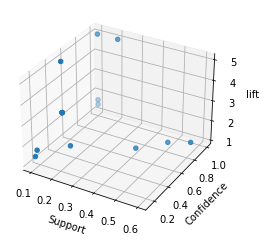

In [43]:
# plotting 3D for the rules generated
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(Support_ori,confidence_ori,lift_ori)
ax1.set_xlabel("Support")
ax1.set_ylabel("Confidence")
ax1.set_zlabel("lift")


Text(0, 0.5, 'confidence')

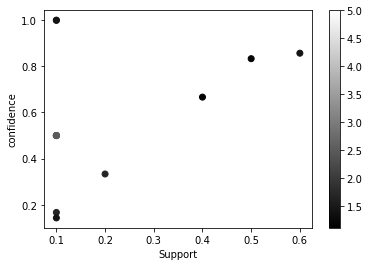

In [44]:
#Plotting the a scatter plot

plt.scatter(Support_ori,confidence_ori, c =lift_ori, cmap ='gray')
plt.colorbar()
plt.xlabel("Support")
plt.ylabel("confidence")

In [45]:
#LOTR1 , LOTR2
##PATRIOT , SIXTH SENSE
#Sixth Sense , Gladiator

### Model with other than Zero values and  model with the dummy variables given in the data set itself are giving two different values
##Considering the model with the dummy variables given in the data set itself are giving two different values